In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [33]:
df=pd.read_csv('genius.csv', index_col=0)
df.drop(['Special_C','Period'], axis=1, inplace=True)
df.head()

,Club_V,Position_Class,Value,Wage,International Reputation,Age_C,Over_C,Loaned
0,3,3,110500000.0,565000.0,5.0,6,18,1
1,3,3,77000000.0,405000.0,5.0,7,18,1
2,3,3,118500000.0,290000.0,5.0,4,17,1
3,3,0,72000000.0,260000.0,4.0,5,16,1
4,3,2,102000000.0,355000.0,4.0,5,16,1


In [22]:
# log_value = np.log1p(ge.Value)
# log_wage = np.log1p(ge.Wage)
# df=pd.concat([ge,log_value,log_wage],axis=1)
# # df.drop(['Value','Wage'], axis=1, inplace=True)

In [34]:
df.Over_C=df.Over_C.astype('str')
df.Age_C=df.Age_C.astype('str')
df.Club_V=df.Club_V.astype('str')
df.Position_Class=df.Position_Class.astype('str')
# df['International Reputation']=df['International Reputation'].astype('str')
df_o=pd.get_dummies(df)

In [48]:
df_o.columns

Index(['Value', 'Wage', 'International Reputation', 'Loaned', 'Club_V_0',
       'Club_V_1', 'Club_V_2', 'Club_V_3', 'Position_Class_0',
       'Position_Class_1', 'Position_Class_2', 'Position_Class_3', 'Age_C_1',
       'Age_C_11', 'Age_C_2', 'Age_C_3', 'Age_C_4', 'Age_C_5', 'Age_C_6',
       'Age_C_7', 'Age_C_8', 'Age_C_9', 'Over_C_10', 'Over_C_11', 'Over_C_12',
       'Over_C_13', 'Over_C_14', 'Over_C_15', 'Over_C_16', 'Over_C_17',
       'Over_C_18', 'Over_C_2', 'Over_C_3', 'Over_C_4', 'Over_C_5', 'Over_C_6',
       'Over_C_7', 'Over_C_8', 'Over_C_9'],
      dtype='object')

In [47]:
X= df_o.drop(['Wage'],axis = 1)
y= df_o['Wage']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=7)
# 단순 회귀 분석 모형 생성 및 평가
lr = LinearRegression()
lr.fit(X_train, y_train)
pred= lr.predict(X_test)
mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,pred) # r_square = lr.score(X_test, y_test)도 같은 값

print('MSE: {0:.3f}, RMSE: {1:.3f}, r2 score: {2:.3f}'.format(mse, rmse,r2))

MSE: 565934569.982, RMSE: 23789.379, r2 score: 0.779


In [49]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [50]:
params = {'alpha':[0.001,0.005,0.01,0.05,0.1,0.5,1,5,10,12,15]}

lr = LinearRegression()
rd = Ridge()
ls = Lasso()

models = [rd,ls]
for model in models:
    grid = GridSearchCV(model, param_grid = params, cv=5, scoring = 'neg_mean_squared_error')
    grid.fit(X,y)
    rmse = np.sqrt(-1*grid.best_score_)
    print('{0} 5 CV 시 최적 평균 RMSE 값: {1}, 최적 alpha:{2}'.format(model.__class__.__name__,rmse, grid.best_params_))

Ridge 5 CV 시 최적 평균 RMSE 값: 34313.10846304626, 최적 alpha:{'alpha': 15}
Lasso 5 CV 시 최적 평균 RMSE 값: 34949.6799638921, 최적 alpha:{'alpha': 0.001}


In [51]:
lr = LinearRegression()
rd = Ridge(alpha=15)
ls = Lasso(alpha = 0.001)

models = [lr,rd,ls]
for model in models:
    print(str(model).split('(')[0], np.mean(-1* cross_val_score(model, X,y,scoring = 'neg_mean_squared_error', cv=5)))

LinearRegression 2163895555.2982607
Ridge 1177389412.3967767
Lasso 1221480129.578481


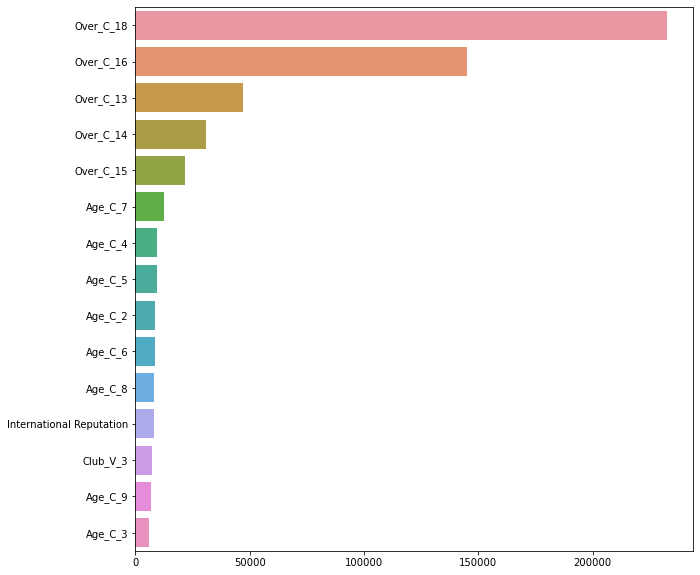

In [54]:
rd = Ridge(0.1)
rd.fit(X_train, y_train)
plt.figure(figsize=(10,10))
coef = pd.Series(rd.coef_, index=X.columns)
coef_sort = coef.sort_values(ascending=False)[:15]
sns.barplot(x=coef_sort.values, y = coef_sort.index)

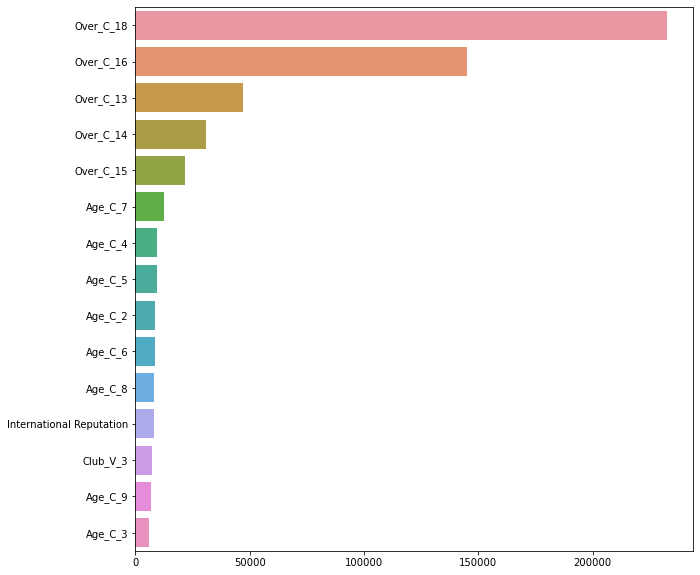

In [55]:
ls = Lasso(0.001)
ls.fit(X_train, y_train)
plt.figure(figsize=(10,10))
coef = pd.Series(rd.coef_, index=X.columns)
coef_sort = coef.sort_values(ascending=False)[:15]
sns.barplot(x=coef_sort.values, y = coef_sort.index)

In [56]:
def predict(model):
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test,pred)
    print(model.__class__.__name__, 'RMSE: {0:.4f}, R2 score: {1:.4f}'.format(rmse,r2))
    
for model in models:
    predict(model)

LinearRegression RMSE: 23789.3794, R2 score: 0.7789
Ridge RMSE: 25435.5449, R2 score: 0.7473
Lasso RMSE: 24243.7466, R2 score: 0.7704


In [57]:
params = {'n_estimators':[800,1000, 1200]}

xgb_reg = XGBRegressor(n_estimators=1000)
lgbm_reg = LGBMRegressor(n_estimators=1000)
# xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, 
#                        colsample_bytree=0.5, subsample=0.8)
# lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4, 
#                          subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)

In [59]:
# 회귀 트리
def get_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params, 
                              scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_train, y_train)
    rmse = np.sqrt(-1* grid_model.best_score_)
    print('{0} 5 CV 시 최적 평균 RMSE 값: {1}, 최적 alpha:{2}'.format(model.__class__.__name__,
                                                              np.round(rmse, 4), grid_model.best_params_))
    return grid_model.best_estimator_

In [60]:
# best estimator 사용
best_xgb = get_best_params(xgb_reg, params)
best_lgbm = get_best_params(lgbm_reg, params)
models = [best_xgb,best_lgbm]
for model in models:
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    r2 = r2_score(y_test,pred)
    print(model.__class__.__name__, 'RMSE: {0:.4f}, R2 score: {1:.4f}'.format(rmse,r2))

XGBRegressor 5 CV 시 최적 평균 RMSE 값: 28984.8215, 최적 alpha:{'n_estimators': 800}
LGBMRegressor 5 CV 시 최적 평균 RMSE 값: 28894.1339, 최적 alpha:{'n_estimators': 800}
XGBRegressor RMSE: 34949.6800, R2 score: 0.6510
LGBMRegressor RMSE: 34949.6800, R2 score: 0.7140


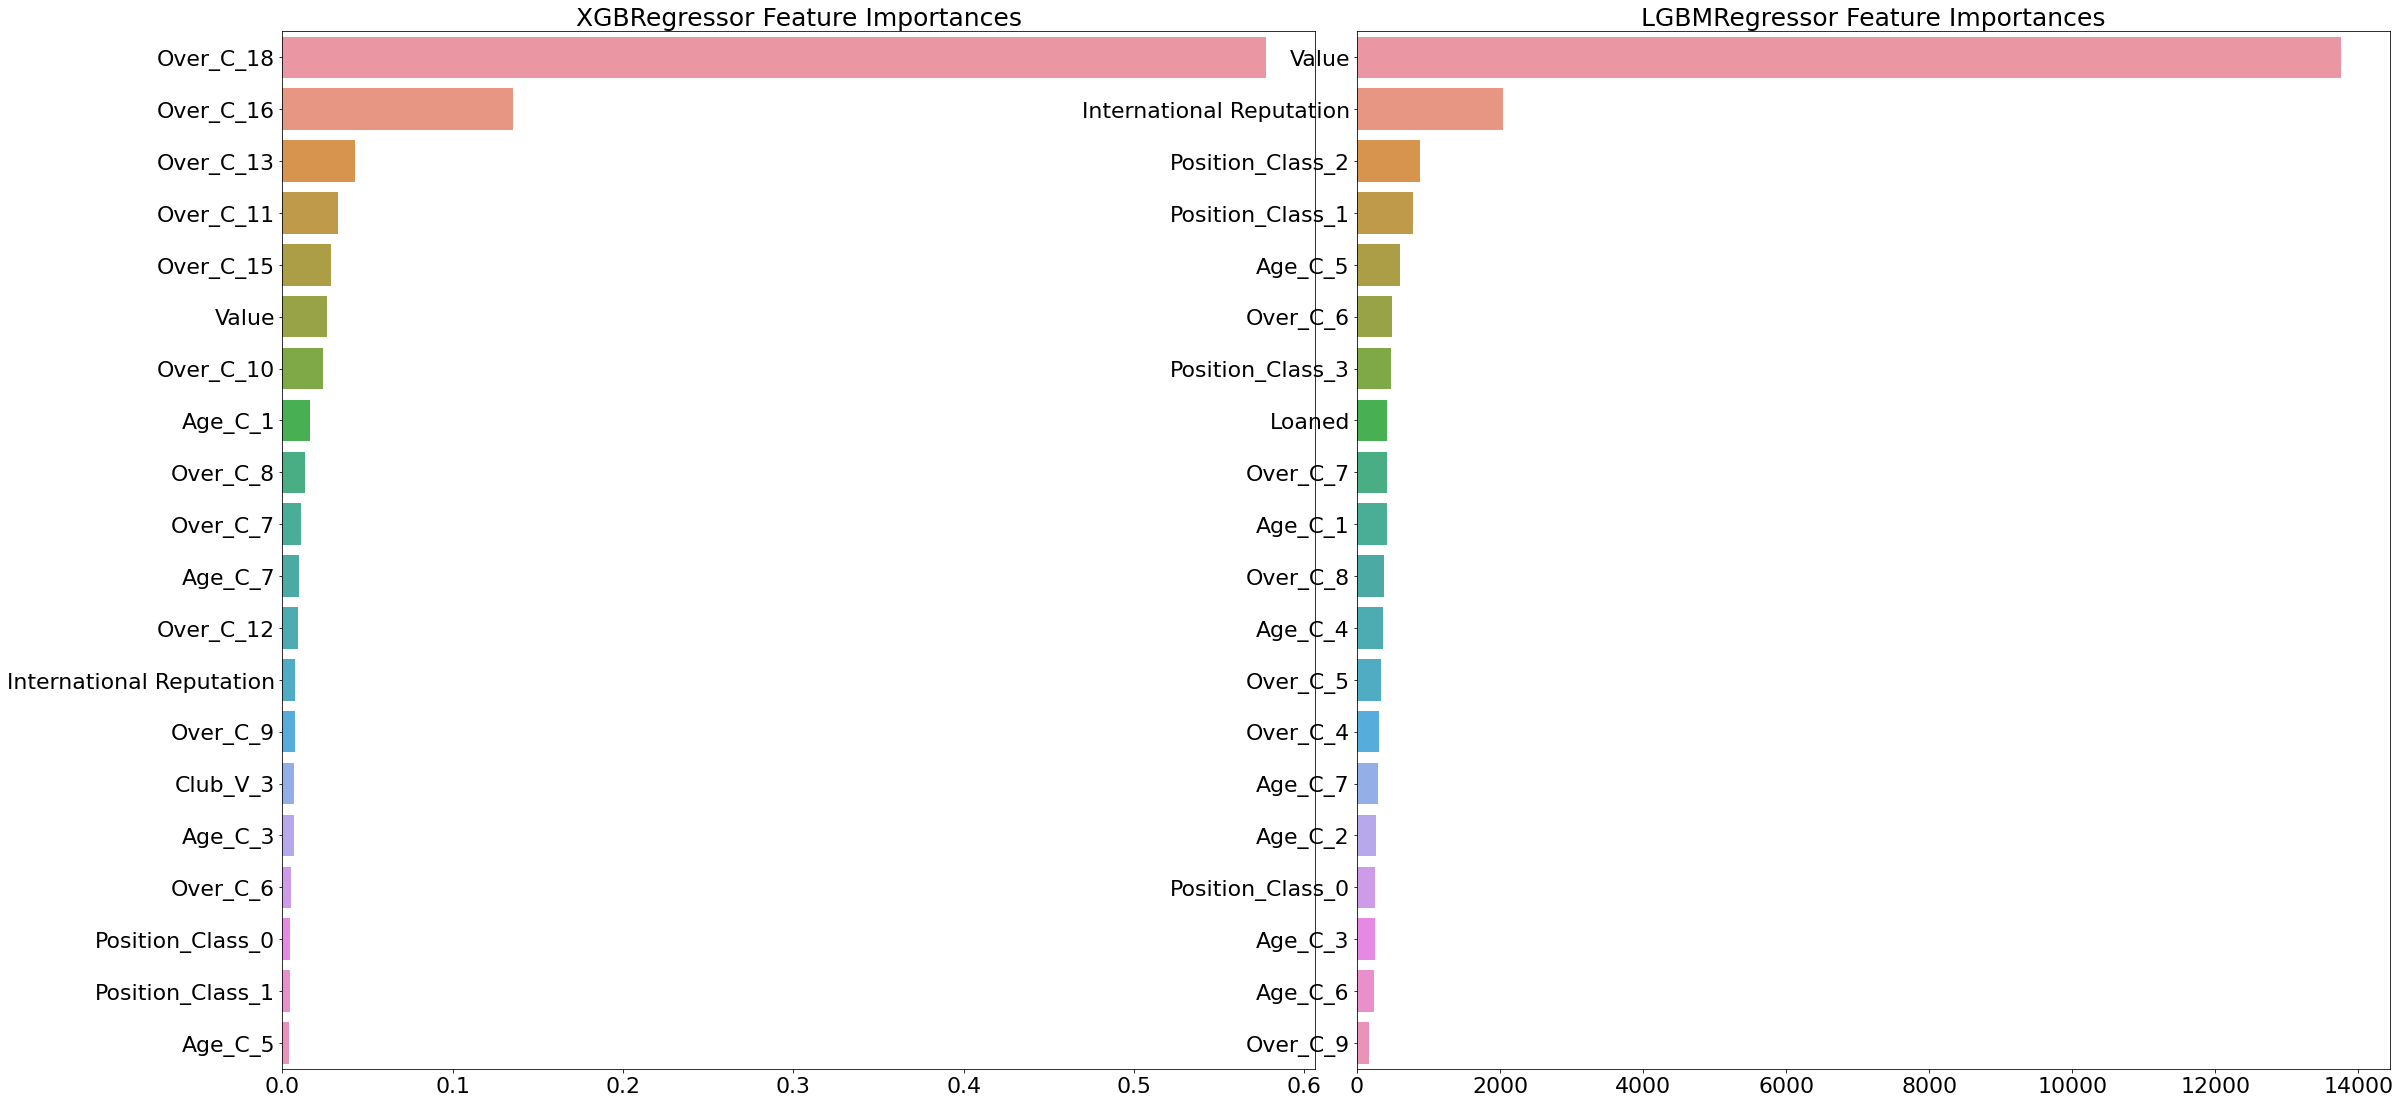

In [61]:
def get_top_features(model):
    ftr_importances_values = model.feature_importances_
    ftr_importances = pd.Series(ftr_importances_values, index=X.columns  )
    ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
    return ftr_top20

def visualize_ftr_importances(models):
    fig, axs = plt.subplots(figsize=(30,15),nrows=1, ncols=2)
    fig.tight_layout() 
    for i_num, model in enumerate(models):
        ftr_top20 = get_top_features(model)
        axs[i_num].set_title(model.__class__.__name__+' Feature Importances', size=25)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=ftr_top20.values, y=ftr_top20.index , ax=axs[i_num])
   
models = [best_xgb, best_lgbm]

visualize_ftr_importances(models)